In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#univariate analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


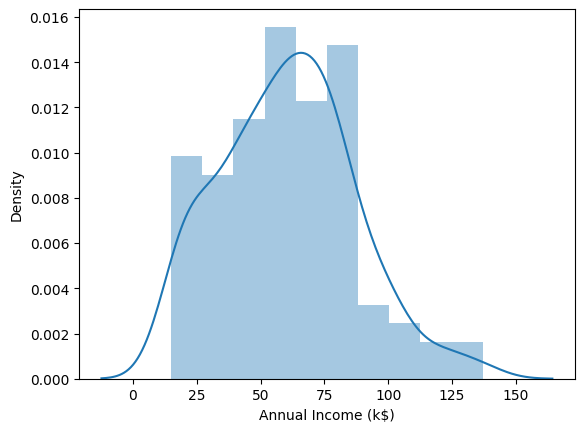

In [64]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

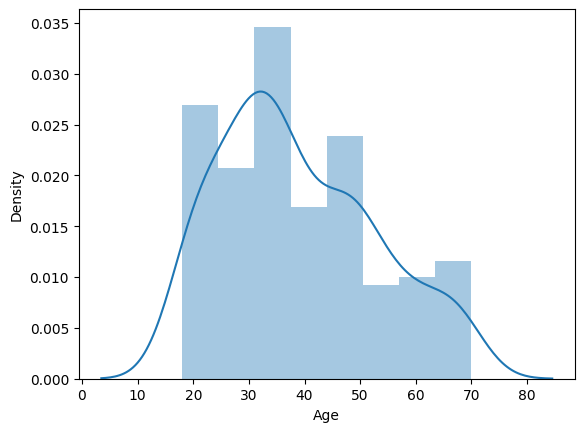

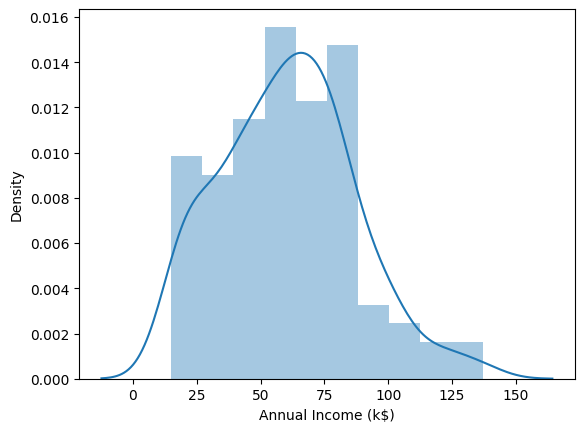

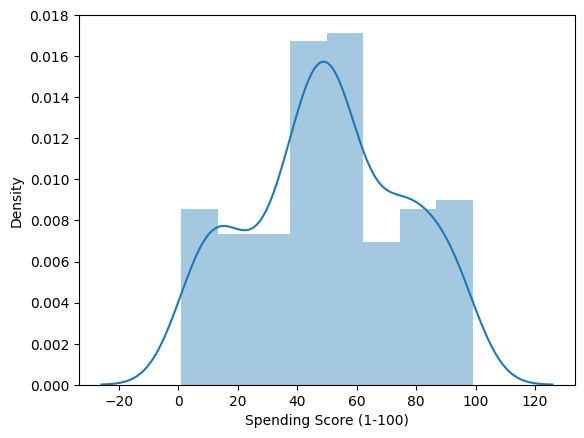

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(df[i])

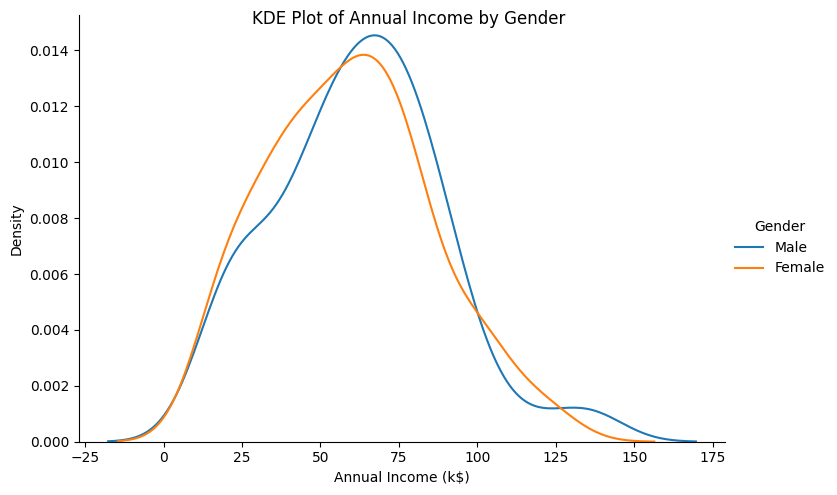

In [65]:
g = sns.FacetGrid(df, hue="Gender", height=5, aspect=1.5)

# Use map to create KDE plots for "Annual Income (k$)" for each gender
g.map(sns.kdeplot, 'Annual Income (k$)', shade=False)

# Add labels and title
g.set_axis_labels("Annual Income (k$)", "Density")
g.fig.suptitle("KDE Plot of Annual Income by Gender")

# Add a legend
g.add_legend()

# Show the plot
plt.show()

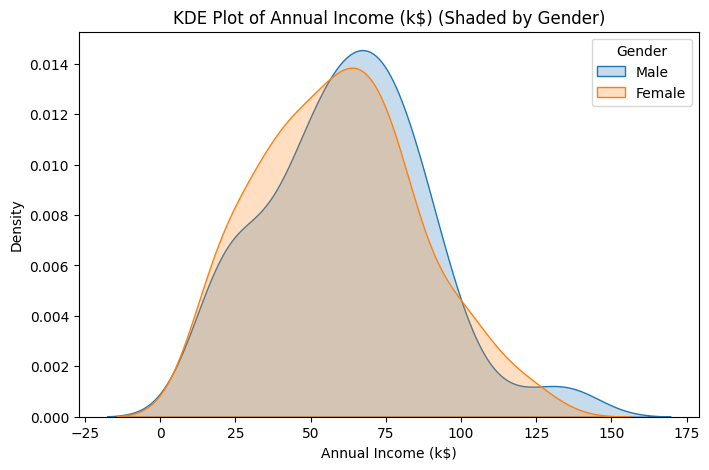

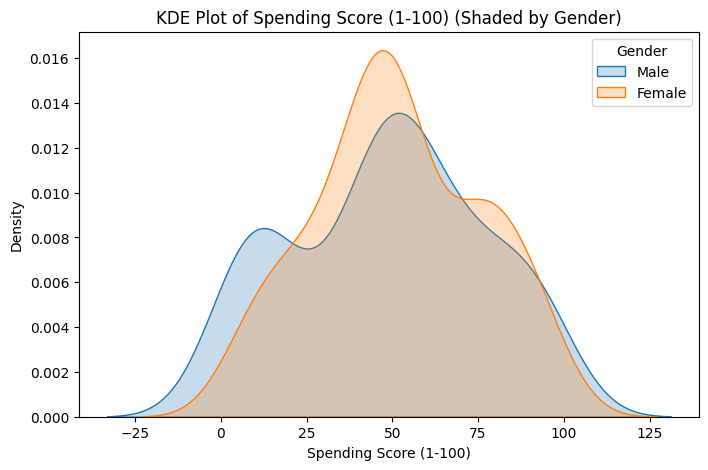

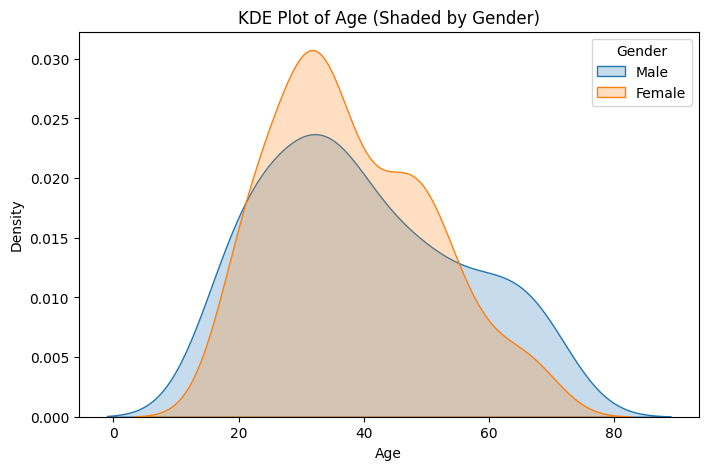

In [68]:
columns_to_kde = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

for column in columns_to_kde:
    # Set up the plot
    plt.figure(figsize=(8, 5))
    
    # Loop through unique 'Gender' values
    for gender in df['Gender'].unique():
        sns.kdeplot(data=df[df['Gender'] == gender], x=column, shade=True, label=gender)
    
    # Add labels and a title
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE Plot of {column} (Shaded by Gender)')
    
    # Add a legend
    plt.legend(title='Gender')
    
    # Show the plot
    plt.show()

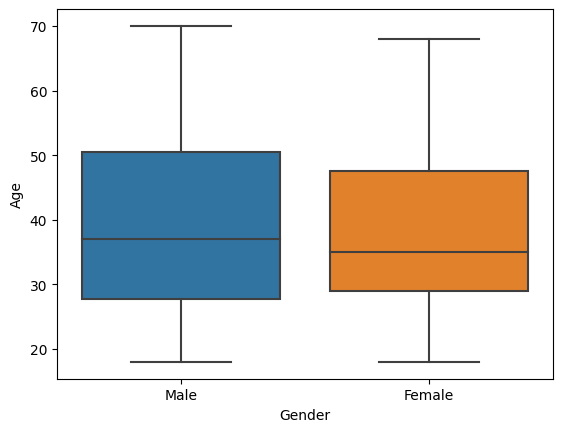

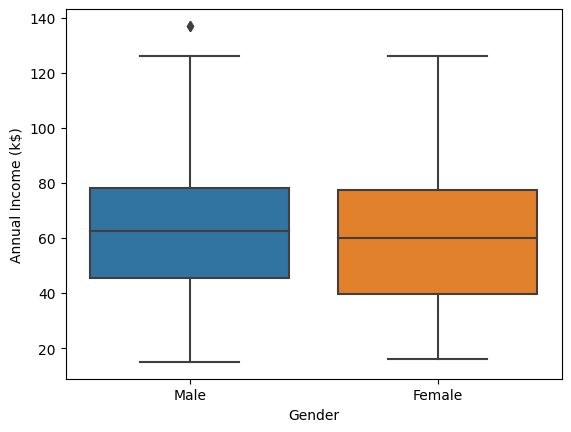

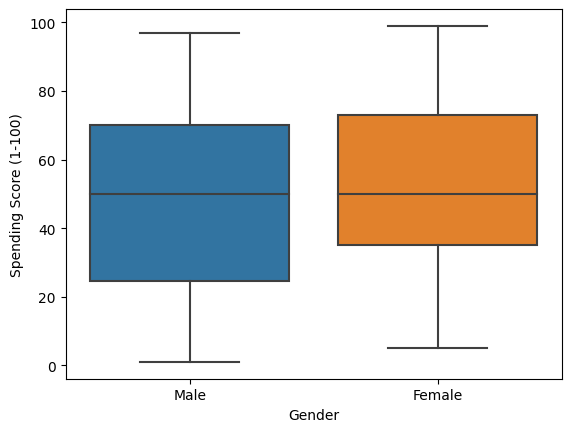

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#bivariate analysis

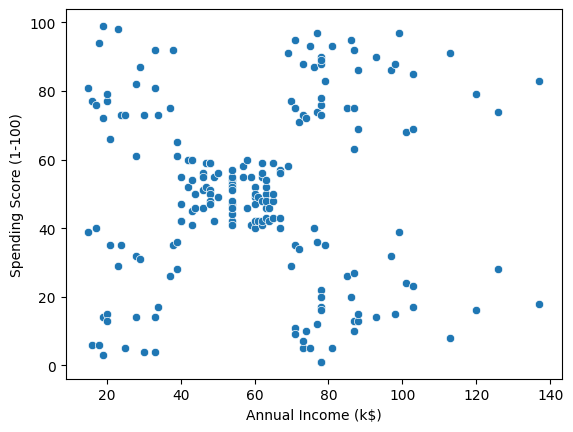

In [12]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)');

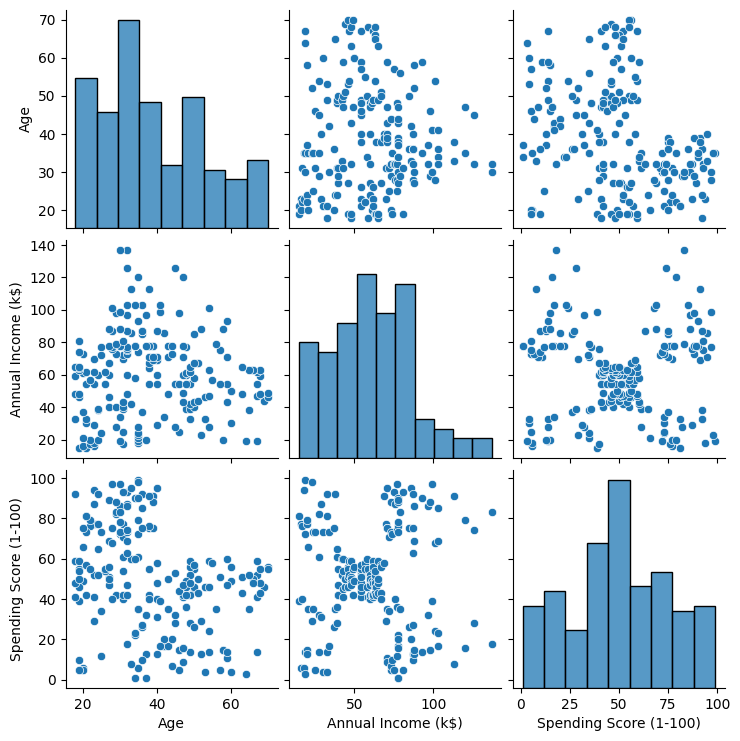

In [13]:
df1 = df.drop('CustomerID', axis = 1)

sns.pairplot(df1)

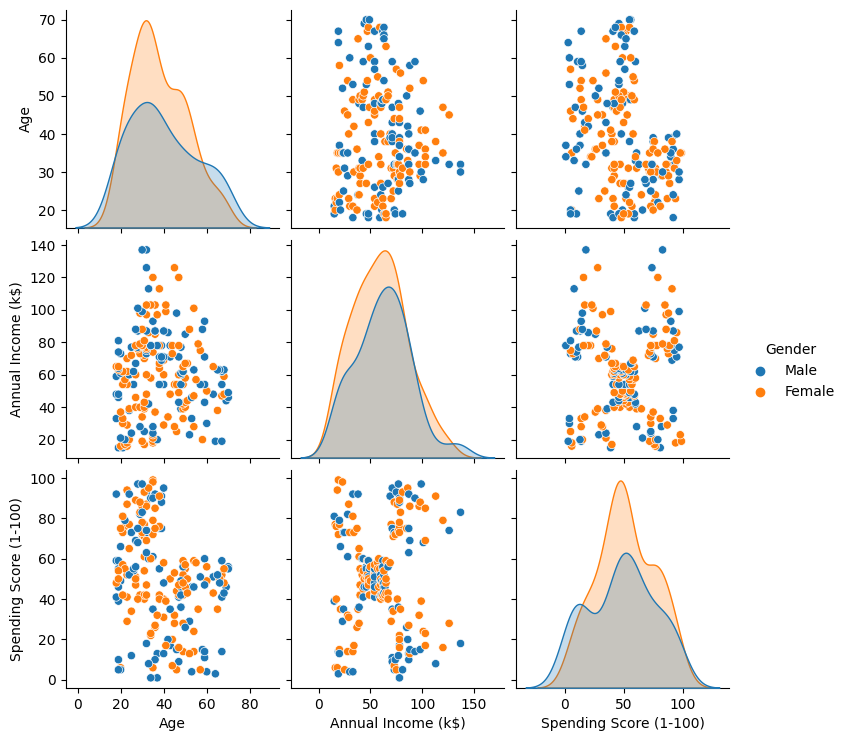

In [14]:
#df1 = df.drop('CustomerID', axis = 1)

sns.pairplot(df1, hue = 'Gender')

In [15]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df1.drop('Gender', axis=1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

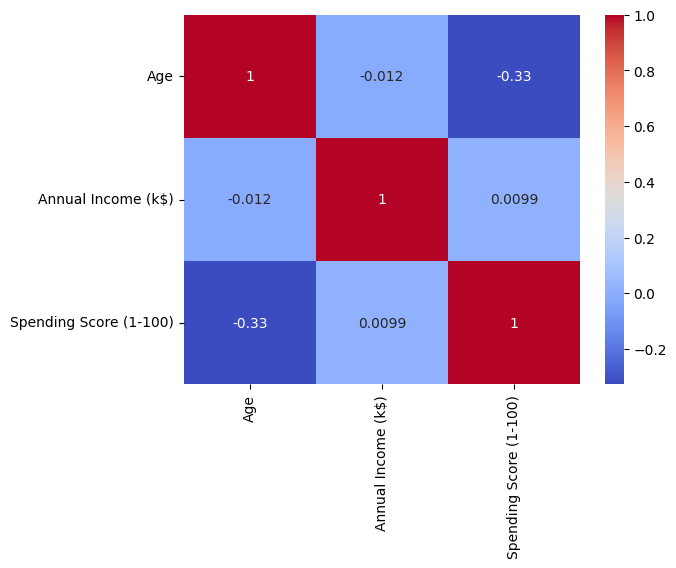

In [17]:
sns.heatmap(df1.drop('Gender', axis=1).corr(), annot=True,cmap='coolwarm')

#clustering = univariate, bivariate, multivariate

In [18]:
clustering1 = KMeans(n_clusters=3)

In [19]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [20]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
df['income cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [22]:
df['income cluster'].value_counts()

income cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [23]:
clustering1.inertia_

23517.33093093093

In [24]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [25]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3981.1499999999987,
 2857.441697191697,
 2177.788239538241,
 1743.4772727272739]

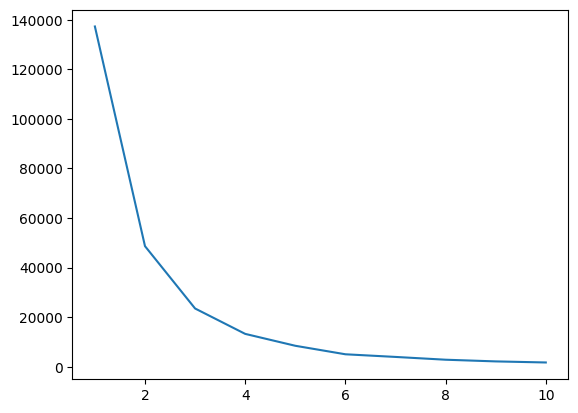

In [26]:
plt.plot(range(1,11),inertia_scores);


In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'income cluster'],
      dtype='object')

In [28]:
df.groupby('income cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


#bivariate clustering

In [29]:

# Select the columns for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Specify the number of clusters (k)
k = 5  # You can change this value based on your requirements

# Initialize the K-Means clustering model
clustering2 = KMeans(n_clusters=k, random_state=0)

# Fit the model to your data
clustering2.fit(X)

# Add the cluster labels as a new column in your DataFrame
df['spending and income cluster'] = clustering2.labels_

# Display the DataFrame with the cluster labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


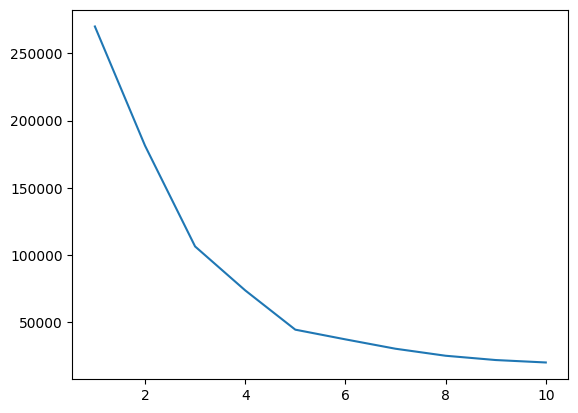

In [30]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_scores2);

In [31]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

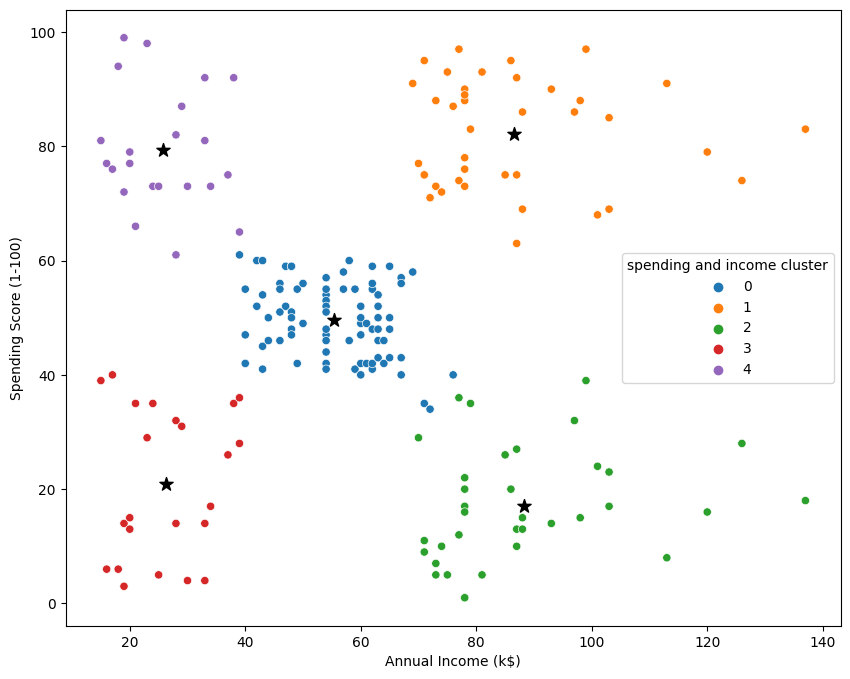

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c = 'black', marker = '*')
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'spending and income cluster', palette = 'tab10');

In [33]:
pd.crosstab(df['spending and income cluster'],df['Gender'], normalize = 'index')

Gender,Female,Male
spending and income cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


In [34]:
df.groupby('spending and income cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending and income cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


#multivariate clustering

In [35]:
%pip install --upgrade scikit-learn

from sklearn.preprocessing import StandardScaler

Note: you may need to restart the kernel to use updated packages.


In [36]:
scale = StandardScaler

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


In [38]:
dff = pd.get_dummies(df, drop_first = True).astype(int)

dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster,Gender_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,4,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,4,0
4,5,31,17,40,1,3,0


In [39]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'spending and income cluster', 'Gender_Male'],
      dtype='object')

In [49]:
dff = dff[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [52]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
dff_scaled = scaler.fit_transform(dff)

# Convert the scaled data back to a DataFrame
dff_scaled_df = pd.DataFrame(dff_scaled, columns=dff.columns)

# Display the scaled DataFrame
dff_scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


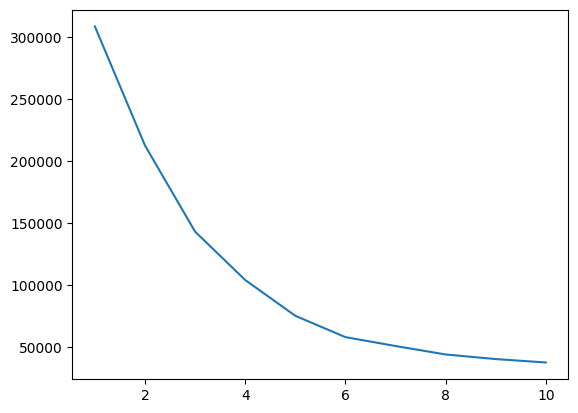

In [53]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [54]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending and income cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,2,2
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,2,2


In [62]:
df.to_csv(r"C:\Users\Hp\Desktop\bike data.csv")